In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as wb
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
tickers =['MSFT', 'PG', '^GSPC']

In [3]:
db = pd.DataFrame()
for x in tickers:
    db[x] = wb.DataReader(x, data_source = 'yahoo', start = '2000-1-1')['Adj Close']
db.head()

,MSFT,PG,^GSPC
Date,,,
2000-01-03,36.555378,29.357332,1455.219971
2000-01-04,35.320534,28.792440,1399.420044
2000-01-05,35.692940,28.244665,1402.109985
2000-01-06,34.497295,29.545643,1403.449951
2000-01-07,34.948109,31.907919,1441.469971


<AxesSubplot:xlabel='Date'>

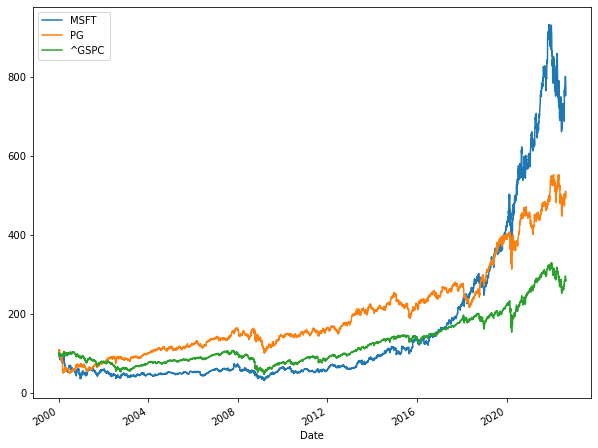

In [4]:
(db/db.iloc[0]*100).plot(figsize = (10,8))

In [5]:
returns = np.log(db/db.shift(1))  ### log returns used
returns.head()

,MSFT,PG,^GSPC
Date,,,
2000-01-03,NaN,NaN,NaN
2000-01-04,-0.034364,-0.019429,-0.039099
2000-01-05,0.010488,-0.019208,0.001920
2000-01-06,-0.034072,0.045032,0.000955
2000-01-07,0.012983,0.076918,0.026730


In [6]:
ann_cov = returns.cov()*250
ann_cov

,MSFT,PG,^GSPC
MSFT,0.093257,0.018402,0.042397
PG,0.018402,0.046732,0.020467
^GSPC,0.042397,0.020467,0.038882


In [7]:
ann_corr = returns.corr()
ann_corr

,MSFT,PG,^GSPC
MSFT,1.000000,0.278753,0.704087
PG,0.278753,1.000000,0.480142
^GSPC,0.704087,0.480142,1.000000


In [8]:
ann_mean = returns.mean() *250
ann_mean

MSFT     0.088679
PG       0.070337
^GSPC    0.045889
dtype: float64

In [9]:
ann_std = returns.std() * 250 **0.5
ann_std

MSFT     0.305379
PG       0.216175
^GSPC    0.197185
dtype: float64

In [10]:
num_assets = len(tickers)
num_assets

3

In [11]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)      # divide by weights w1/w1+w2..., 25/w1 + w2.. so that when you add these new random sum will be 1
weights

array([0.39540382, 0.12489241, 0.47970377])

In [12]:
#port return
np.sum(weights * returns.mean()) * 250

0.0658616826622905

In [13]:
#expected port var
np.dot(weights.T, np.dot(returns.cov() *250 ,weights))

0.04460983778082027

In [14]:
# volatality
np.sqrt(np.dot(weights.T, np.dot(returns.cov() *250 ,weights)))

0.2112104111563165

In [15]:
port_return = []
port_vol = []
ms = []
pg = []
sp = []
for x in range(5000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)      # divide by weights w1/w1+w2..., 25/w1 + w2.. so that when you add these new random sum will be 1
    port_return.append(np.sum(weights * returns.mean()) * 250)
    port_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() *250 ,weights))))
    ms.append(weights[0])
    pg.append(weights[1])
    sp.append(weights[2])
    
port_return = np.array(port_return)
port_vol = np.array(port_vol)
ms = np.array(ms)
pg = np.array(pg)
sp = np.array(sp)


In [16]:
portfolio = pd.DataFrame({'return':port_return, 'vol':port_vol, 'ms': ms, 'pg': pg, 'sp': sp})
portfolio['check'] = portfolio['ms'] + portfolio['pg']+ portfolio['sp']
portfolio.head()

,return,vol,ms,pg,sp,check
0,0.072629,0.215362,0.492078,0.232514,0.275408,1.0
1,0.055446,0.195094,0.167902,0.097051,0.735047,1.0
2,0.074661,0.209350,0.477147,0.341739,0.181114,1.0
3,0.075547,0.224504,0.563574,0.226706,0.209720,1.0
4,0.073906,0.247463,0.636926,0.031228,0.331846,1.0


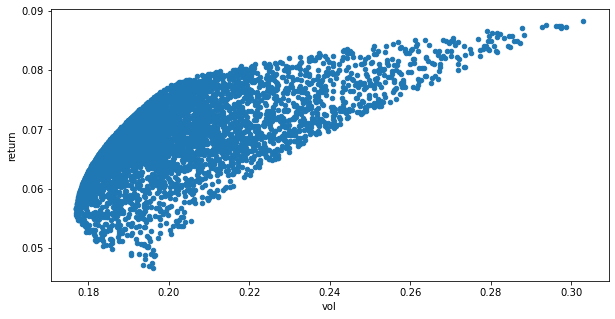

In [17]:
portfolio.plot(x = 'vol', y = 'return', kind = 'scatter', figsize = (10,5))
plt.xlabel('vol')
plt.ylabel('return')
plt.show()

In [18]:
# Assuming risk free rate of 2%
portfolio['sharpe'] = (portfolio['return'] - 0.02)/portfolio['vol']
portfolio.head()

,return,vol,ms,pg,sp,check,sharpe
0,0.072629,0.215362,0.492078,0.232514,0.275408,1.0,0.244377
1,0.055446,0.195094,0.167902,0.097051,0.735047,1.0,0.181689
2,0.074661,0.209350,0.477147,0.341739,0.181114,1.0,0.261098
3,0.075547,0.224504,0.563574,0.226706,0.209720,1.0,0.247419
4,0.073906,0.247463,0.636926,0.031228,0.331846,1.0,0.217837


In [19]:
portfolio.max()

return    0.088236
vol       0.302997
ms        0.987468
pg        0.984281
sp        0.979130
check     1.000000
sharpe    0.286218
dtype: float64

In [20]:
portfolio['sharpe'].idxmax()    # location of highest in column

2456

In [21]:
portfolio.iloc[1217]

return    0.069810
vol       0.192589
ms        0.324955
pg        0.409717
sp        0.265328
check     1.000000
sharpe    0.258636
Name: 1217, dtype: float64